In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

/var/folders/_3/5rgf1h195y79jr3zhvyk8glh0000gn/T/ipykernel_92699/3505785969.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


<Axes: xlabel='GrLivArea'>

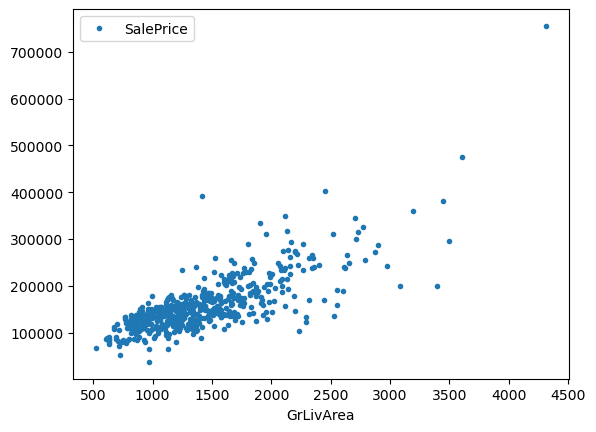

In [3]:
data.plot(x='GrLivArea', y='SalePrice',style='.')

In [4]:
n = len(data)

In [5]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

In [6]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

In [7]:
denominator = n * sum_x2 - sum_x * sum_x

In [8]:
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [9]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

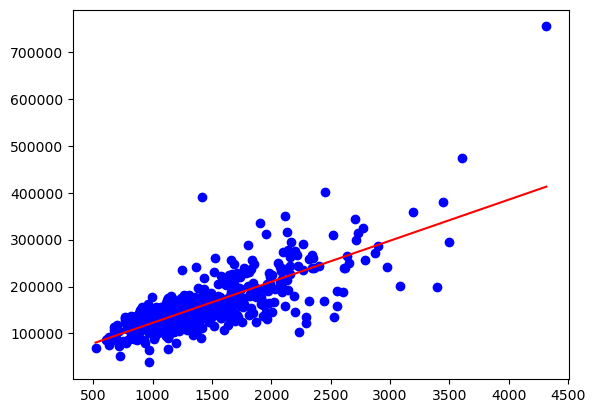

In [10]:
plot_data(x,y,m,b)

In [11]:
def model(x,m,b):
   return m * x + b

In [12]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [13]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [14]:
m = 5.
b = 1000.
print('y_i = %.2f * x + %.2f' % (m,b))

y_i = 5.00 * x + 1000.00


In [15]:
l = loss(x,y,m,b)
print('first 10 loss values: ',l[:10])

first 10 loss values:  [3.03421561e+10 3.55511025e+10 1.24579082e+10 1.91656336e+10
 1.60604929e+10 2.04432804e+10 1.72410030e+10 1.76517796e+10
 1.52769600e+10 2.18152900e+10]


y_i = 5.47 * x + 1000.00     previously calculated: y_i = 87.69 * x + 34754.08


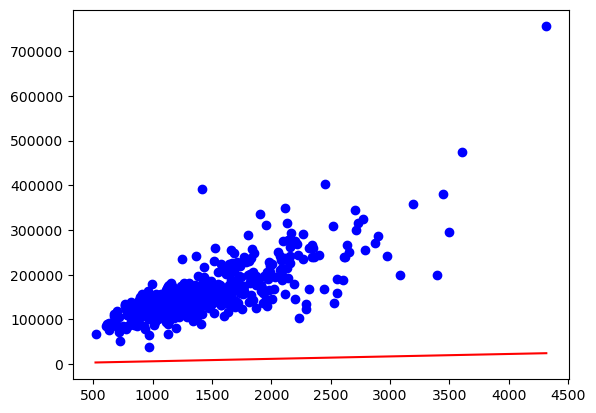

In [16]:
learning_rate = 1e-9
m = updated_m(x,y,m,b,learning_rate)
b = updated_b(x,y,m,b,learning_rate)
print('y_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f' % (m,b,m_calc,b_calc))
plot_data(x,y,m,b)

[029]  dy_i = 88.89 * x + 32912.24     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478200827.641291


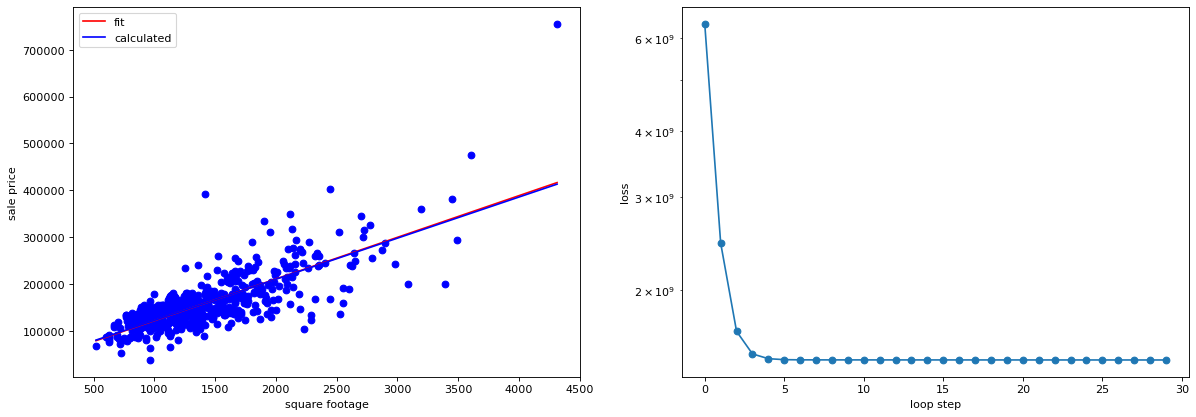

In [17]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
# we run our loop N times
loop_N = 30
for i in range(loop_N):
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
   
   # close/delete previous plots
   plt.close('all')
   
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y, 'o-')
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)



# Homework
## Mini Batch Training
In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

Instead of using the entire dataset like 
```python
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
```
Use 
```python
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
```

You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.
```python
loop_N = 30*len(data)//batch_size
```

Please plot your learning curve for different batch size, such as 32, 64, 128, 256, 512. 

## Learning rate issue (Bonus)
As described above, if the learning rate is too large, it will affect the convergence. Do your training with (batch_size = 64, learning_rate_m = 1e-7, learning_rate_b = 1e-1). Then linearly increase the batch size and learning rate until you see the training does not converge. 
```
(64, 1e-7, 1e-1)*1
(64, 1e-7, 1e-1)*2
(64, 1e-7, 1e-1)*4
(64, 1e-7, 1e-1)*8
...
```

**How to submit your homework**
* Fork the github repo to your personal github 
* Make change to the 01_linear_regression_sgd.ipynb, and then push to your personal github
* Provide the link of 01_linear_regression_sgd in the personal github. 

Follow the below instruction on how to do this: 
https://github.com/argonne-lcf/ai-science-training-series/blob/main/00_introToAlcf/03_githubHomework.md

# Answer: part 1

Batch Size: 512
[031]  dy_i = 88.56 * x + 32935.05     loss: 1457531392.754458
Convergence not reached for batch size: 512


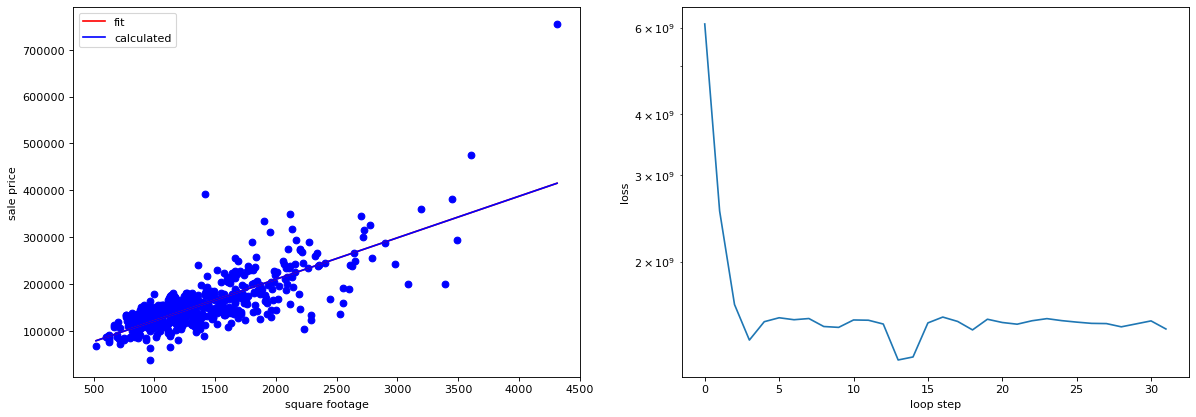

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import time


# Initialize parameters
m = 5.
b = 1000.
learning_rate_m = 1e-7
learning_rate_b = 1e-1

convergence_threshold = 1e-3
# Flag to track convergence
convergence_flag = False

# Initialize an empty dictionary to store the lists of loss values for each batch size
loss_history = {}

# set rang of batch size
batch_sizes = 2**5 * np.arange(1, 2**4 + 1) # from 32 to 512  
# batch_sizes = [32, 64, 128]

for batch_size in batch_sizes:
    

    #save loss history for each batch size
    loss_history[f"batch_size_{batch_size}"] = []

    
    previous_loss = float('inf')
    
    loop_N = 30*len(data)//batch_size
    
    
    # Reset parameters
    m = 5.
    b = 1000.
    
    # Run the loop until convergence
    for i in range(loop_N):
        data_batch = data.sample(batch_size)
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()
        
        m = updated_m(data_x, data_y, m, b, learning_rate_m)
        b = updated_b(data_x, data_y, m, b, learning_rate_b)

        loss_value = np.mean(loss(data_x, data_y, m, b))
        loss_history[f"batch_size_{batch_size}"].append(loss_value)

        print(f"Batch Size: {batch_size}")

        print('[%03d]  dy_i = %.2f * x + %.2f     loss: %f' % (i, m, b, loss_value))
        
        # Check for convergence
        if abs(previous_loss - loss_value) < convergence_threshold:
            print("Convergence reached for batch size:", batch_size)
            convergence_flag = True
            
        
        previous_loss = loss_value

        if loop_N - 1 == i:
            print("Convergence not reached for batch size:", batch_size)


        plt.close('all')
        fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=80)
        plot_data(data_x, data_y, m, b, ax[0])

        line_x = np.arange(data_x.min(), data_x.max())
        line_y = line_x * m + b
        ax[0].plot(line_x, line_y, 'b-', label='calculated')
        ax[0].legend()
        ax[0].set_xlabel('square footage')
        ax[0].set_ylabel('sale price')

        loss_x = np.arange(0, len(loss_history[f"batch_size_{batch_size}"]))
        loss_y = np.asarray(loss_history[f"batch_size_{batch_size}"])
        ax[1].plot(loss_x, loss_y)
        ax[1].set_yscale('log')
        ax[1].set_xlabel('loop step')
        ax[1].set_ylabel('loss')
        plt.show()

        time.sleep(2.5)
        ipydis.clear_output(wait=True)


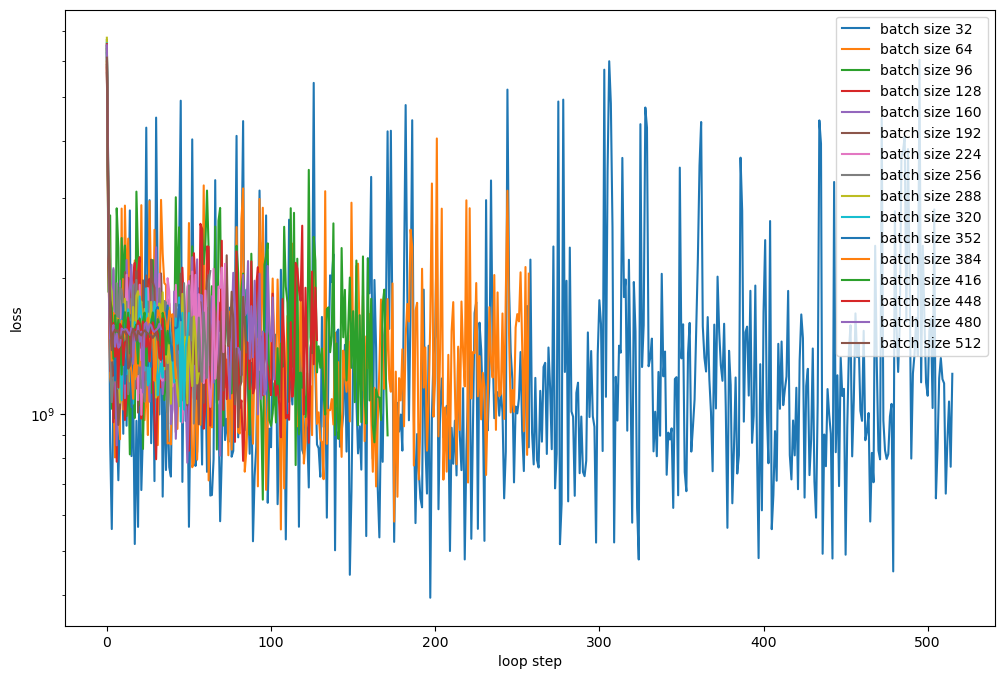

In [52]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for each batch size
for i in batch_sizes:
    ax.plot(loss_history[f"batch_size_{i}"], label=f"batch size {i}")

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Set labels and legend
ax.set_xlabel('loop step')
ax.set_ylabel('loss')
ax.legend()

# Show the plot
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Create a single canvas with subplots
# fig, axs = plt.subplots(int(len(batch_sizes)/3), 3, figsize=(15, 10))

# # Plot each batch size on a separate subplot
# for i, batch_size in enumerate(batch_sizes):
#     ax = axs[i // 3, i % 3]  # Calculate the correct row and column indices
#     ax.plot(loss_history[f"batch_size_{batch_size}"], label=f"batch size {batch_size}")
#     ax.set_yscale('log')
#     ax.set_xlabel('loop step')
#     ax.set_ylabel('loss')
#     ax.legend()

# # Adjust layout
# plt.tight_layout()

# # Show the plot
# plt.show()


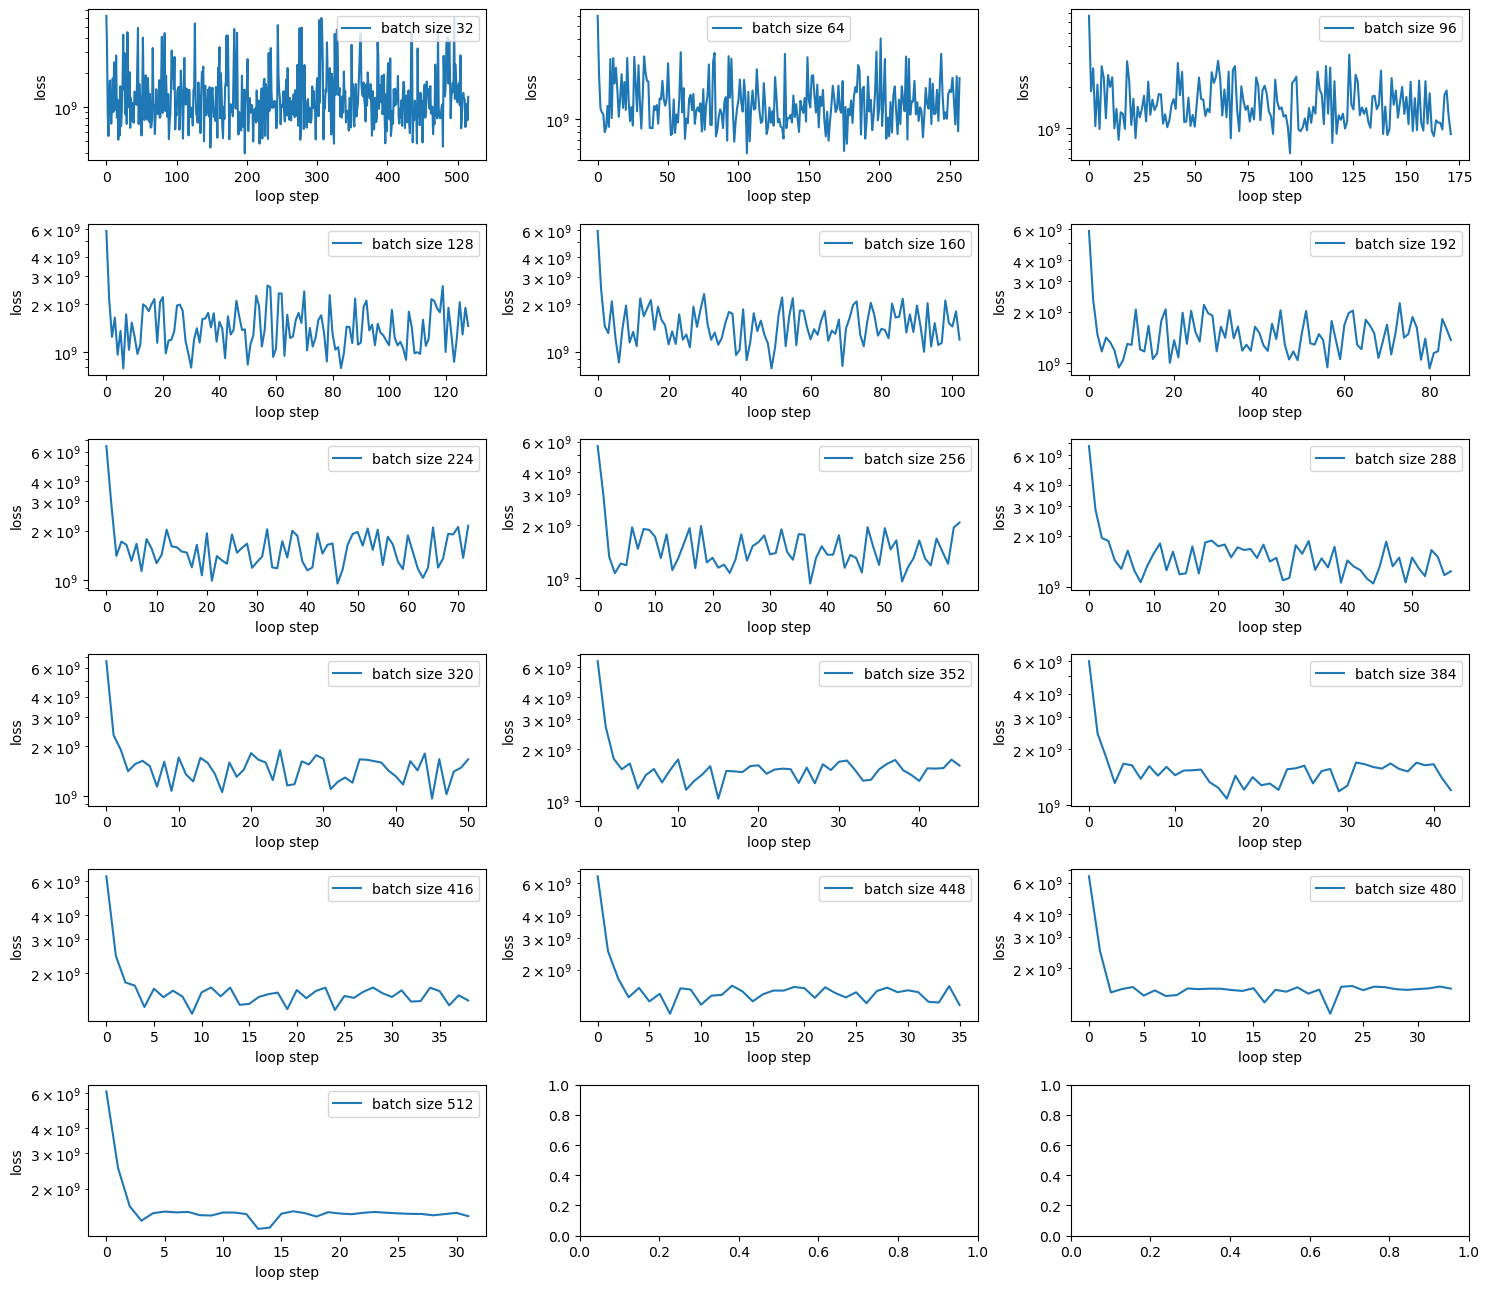

In [80]:
import matplotlib.pyplot as plt

# Determine the number of rows and columns for the subplots
# num_rows = int(len(batch_sizes) / 3) + (1 if len(batch_sizes) % 3 != 0 else 0)
# num_cols = min(len(batch_sizes), 3)

# Determine the number of rows and columns for the subplots
num_rows = (len(batch_sizes) + 2) // 3
num_cols = min(len(batch_sizes), 3)

# Create a single canvas with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 13))

# Plot each batch size on a separate subplot
for i, batch_size in enumerate(batch_sizes):
    row = i // 3
    col = i % 3
    ax = axs[row, col]  # Calculate the correct row and column indices
    ax.plot(loss_history[f"batch_size_{batch_size}"], label=f"batch size {batch_size}")
    ax.set_yscale('log')
    ax.set_xlabel('loop step')
    ax.set_ylabel('loss')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Answer: part 2

In [22]:
#set the initial values
batch_size = 64
learning_rate_m = 1e-7
learning_rate_b = 1e-1

# Initialize an empty dictionary to store the lists of loss values for each batch size
loss_history = {}

for ii in [1, 2, 4, 6, 8, 10]:
    batch_size *= ii
    learning_rate_m *= ii
    learning_rate_b *= ii
    print(f"Batch Size: {batch_size}")
    print(f"Learning Rate M: {learning_rate_m}")
    print(f"Learning Rate B: {learning_rate_b}")
    print("\n")


Batch Size: 64
Learning Rate M: 1e-07
Learning Rate B: 0.1


Batch Size: 128
Learning Rate M: 2e-07
Learning Rate B: 0.2


Batch Size: 512
Learning Rate M: 8e-07
Learning Rate B: 0.8


Batch Size: 3072
Learning Rate M: 4.8e-06
Learning Rate B: 4.800000000000001


Batch Size: 24576
Learning Rate M: 3.84e-05
Learning Rate B: 38.400000000000006


Batch Size: 245760
Learning Rate M: 0.000384
Learning Rate B: 384.00000000000006




Batch Size: 512
[031]  dy_i = -522478.16 * x + 888507242.46     loss: 98103891940468144.000000
Convergence not reached for batch size: 512


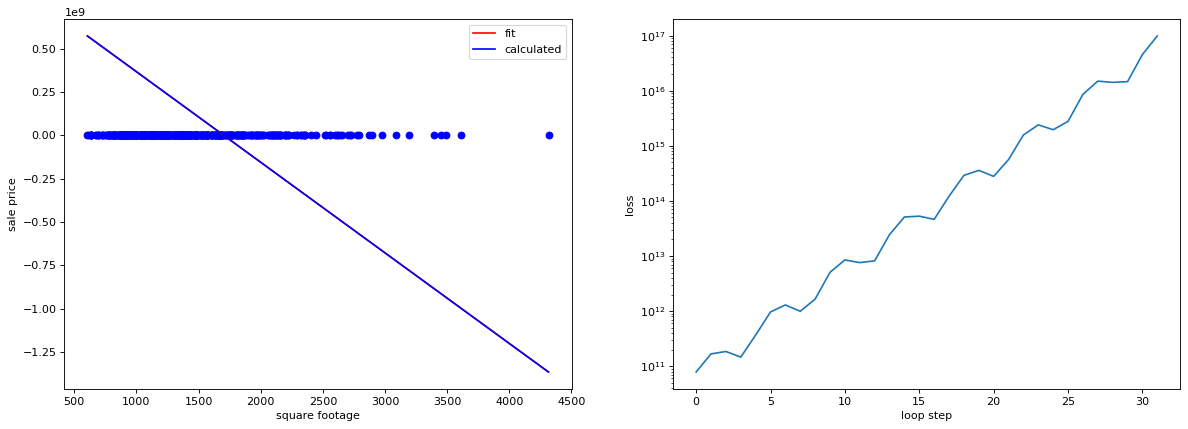

In [26]:
# linearly increase the batch size and learning rate until you see the training does not converge
# the learning rate is too high if the loss does not decrease
# the batch size is too high if the loss does not decrease
# the batch size is too low if the loss does not decrease
# the learning rate is too low if the loss does not decrease
# the learning rate is too high if the loss does not decrease

#set the initial values
batch_size = 64
learning_rate_m = 1e-7
learning_rate_b = 1e-1

# Initialize an empty dictionary to store the lists of loss values for each batch size
loss_history = {}

for ii in [1, 2, 4, 6, 8]:
    batch_size = 64
    learning_rate_m = 1e-7
    learning_rate_b = 1e-1
    batch_size *= ii
    learning_rate_m *= ii
    learning_rate_b *= ii
    print(f"Batch Size: {batch_size}")
    print(f"Learning Rate M: {learning_rate_m}")
    print(f"Learning Rate B: {learning_rate_b}")
    print("\n")

    #save loss history for each batch size
    loss_history[f"batch_size_{ii}"] = []

    
    previous_loss = float('inf')
    
    loop_N = 30*len(data)//batch_size
    
    
    # Reset parameters
    m = 5.
    b = 1000.
    
    # Run the loop until convergence
    for i in range(loop_N):
        data_batch = data.sample(batch_size)
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()
        
        m = updated_m(data_x, data_y, m, b, learning_rate_m)
        b = updated_b(data_x, data_y, m, b, learning_rate_b)

        loss_value = np.mean(loss(data_x, data_y, m, b))
        loss_history[f"batch_size_{ii}"].append(loss_value)

        print(f"Batch Size: {batch_size}")

        print('[%03d]  dy_i = %.2f * x + %.2f     loss: %f' % (i, m, b, loss_value))
        
        
        previous_loss = loss_value

        if loop_N - 1 == i:
            print("Convergence not reached for batch size:", batch_size)


        plt.close('all')
        fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=80)
        plot_data(data_x, data_y, m, b, ax[0])

        line_x = np.arange(data_x.min(), data_x.max())
        line_y = line_x * m + b
        ax[0].plot(line_x, line_y, 'b-', label='calculated')
        ax[0].legend()
        ax[0].set_xlabel('square footage')
        ax[0].set_ylabel('sale price')

        loss_x = np.arange(0, len(loss_history[f"batch_size_{ii}"]))
        loss_y = np.asarray(loss_history[f"batch_size_{ii}"])
        ax[1].plot(loss_x, loss_y)
        ax[1].set_yscale('log')
        ax[1].set_xlabel('loop step')
        ax[1].set_ylabel('loss')
        plt.show()

        time.sleep(2.5)
        ipydis.clear_output(wait=True)



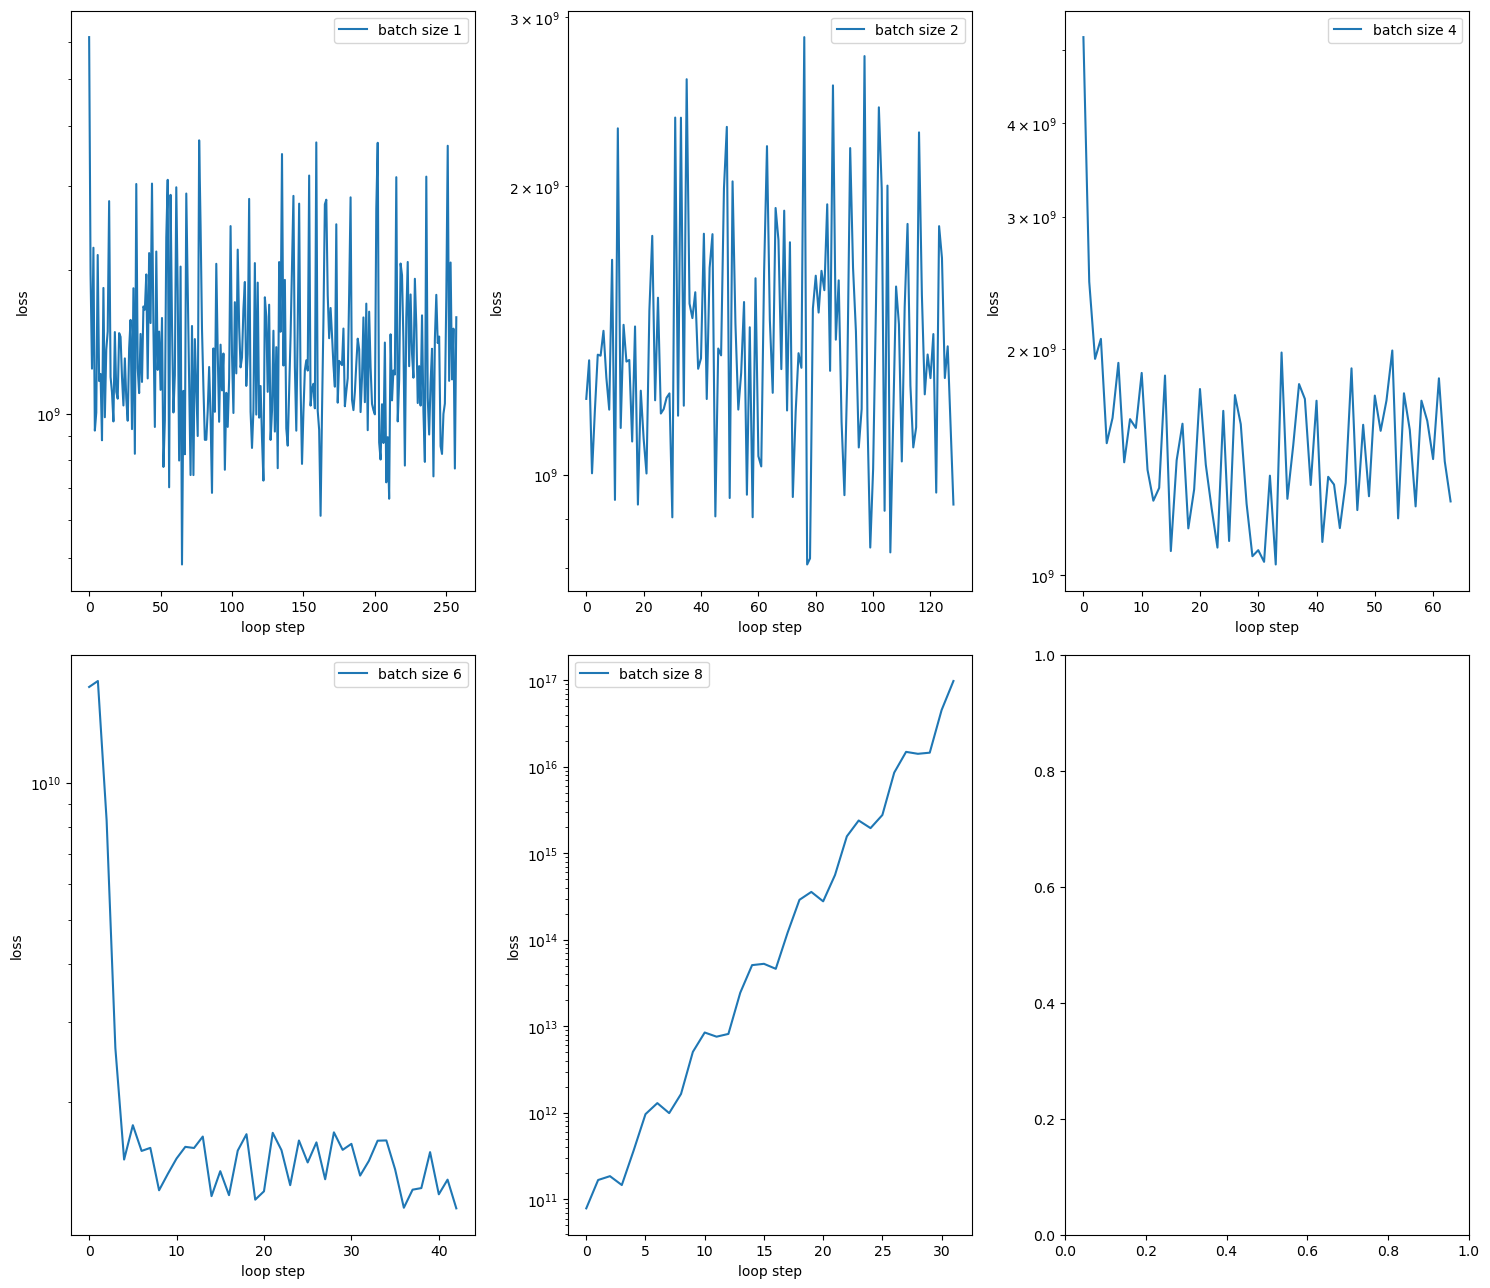

In [31]:
import matplotlib.pyplot as plt

# Determine the number of rows and columns for the subplots
# num_rows = int(len(batch_sizes) / 3) + (1 if len(batch_sizes) % 3 != 0 else 0)
# num_cols = min(len(batch_sizes), 3)

# Determine the number of rows and columns for the subplots
num_rows = (5 + 2) // 3
num_cols = min(5, 3)

# Create a single canvas with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 13))

# Plot each batch size on a separate subplot
for i, ii in enumerate([1, 2, 4, 6, 8]):
    row = i // 3
    col = i % 3
    ax = axs[row, col]  # Calculate the correct row and column indices
    ax.plot(loss_history[f"batch_size_{ii}"], label=f"batch size {ii}")
    ax.set_yscale('log')
    ax.set_xlabel('loop step')
    ax.set_ylabel('loss')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
